# Separating Mouse and Human Antibody Sequences using Protein Encoding and Machine Learning Classifiers

### Questions:

- How can we train a machine learning classifier to tell apart two groups of protein sequences?

- How may we check for overfitting in a trained machine learning classifier?


### Objectives:
    
- Understand how protein sequences can become readable to machine learning predictors

- Check for overfitted data by testing with a totally naive dataset


### Introduction 

If we want to train a classifier that exploits the differences between two groups of proteins, we need to extract numerical information from their amino acid sequences. This is called encoding and can be done through a variety of ways including residue level encoding of each amino acid with a 1x20 vector, representing the possibility of 20 amino acids at each residue. This is called One Hot Encoding, but often leads to a sparse dataset which is not suitable for machine learning tasks as each sequence must be spaced out so they are of equal length. Instead, here we use physiochemical properties that may be calculated from the sequence as numeric information (ElAbd *et al.*, 2020). 

GB: can use binary encoding with 2**5 or 5 bits just five symbols instead.Why not use both approaches rather than just one? E.g. https://www.sciencedirect.com/science/article/pii/S2667318522000058


Antibodies are made up of two heavy and two light chains. However, the functional antigen-binding domains are the Fv, variable fragments, at each fork of the "Y" shape. These Fv fragments are where the variable domains of a heavy chain, VH, and of the light chain, VL, interact and therefore much study has been dedicated to these regions. An antibody record is considered "paired" when both the VH and VL sequences of one antibody are known. In the past, this knowledge was rare as it came from studying individual antibodies. However, the advent of B-cell encapsulation and Next Generation Sequencing now allows researchers to sequence a whole repertoire of paired antibodies (Rajan *et al.*, 2018).

In this Lesson, we will use a sample of 1000 Human and 1000 Mouse paired antibodies taken from the Observed Antibody Space (Olsen *et al.*, 2022) and train a machine learning classifier to tell them apart. Firstly, we will use Kidera Factors (Nakai *et al.*, 1988) and Propythia (Sequeira *et al.*, 2022) to generate our encodings from an input of FASTA formatted sequences. Secondly, we will split those encodings into training and test datasets for a selection of machine learning classifiers and compare the results for both methods of encoding.

GB: Kidera and Propythia are not explained. 


### References

GB: make links instead of putting links
[ElAbd, H., Bromberg, Y., Hoarfrost, A., Lenz, T., Franke, A., & Wendorff, M. (2020). Amino acid encoding for deep learning applications. BMC Bioinformatics, 21(1), 235.](https://doi.org/10.1186/s12859-020-03546-x) 

Nakai, K., Kidera, A., & Kanehisa, M. (1988). Cluster analysis of amino acid indices for prediction of protein structure and function. Protein Engineering, Design and Selection, 2(2), 93-100 https://doi.org/10.1093/protein/2.2.93

Olsen, T. H., Boyles, F., & Deane, C. M. (2022). Observed Antibody Space: A diverse database of cleaned, annotated, and translated unpaired
and paired antibody sequences. Protein Science, 31(1), 141–146. https://doi.org/https://doi.org/10.1002/pro.4205

Rajan, S., Kierny, M. R., Mercer, A., Wu, J., Tovchigrechko, A., Wu, H., Dall′Acqua, W. F., Xiao, X., & Chowdhury, P. S. (2018). Recombinant
human B cell repertoires enable screening for rare, specific, and natively paired antibodies. Communications Biology, 1(1), 5. https://doi.org/10.1038/s42003-017-0006-2

Sequeira, A. M., Lousa, D., & Rocha, M. (2022). ProPythia: A Python package for protein classification based on machine and deep learning.
Neurocomputing, 484, 172–182. https://doi.org/https://doi.org/10.1016/j.neucom.2021.07.102


In [1]:
pip install propythia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 2.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 1.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 1.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
##Get Encodings###
import sys
sys.path.append('../src/')
sys.path.append('')
import pandas as pd
from pandas import read_csv

from propythia.protein.sequence import ReadSequence

sequence=ReadSequence()

from propythia.protein import descriptors

##Data preparation###
from sklearn.utils import check_random_state, shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy import pi, linspace, cos, sin, append, ones, zeros, hstack, vstack, intp
from numpy import mgrid, linspace, c_, arange, mean, array
from numpy.random import uniform, seed


##Machine Learning Models###
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation


##Plotting Results###
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits import mplot3d
from matplotlib.pyplot import subplots, axes, scatter, xticks
from matplotlib.colors import ListedColormap
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef


##Model Optimisation###
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


GB: there are things that are never used: mplot3d, GridSearchCV

why are they imported?


## Generating the Encoded Dataset


Here we input our fasta file and split the entries into VH and VL sequences. We put each set of sequences through the Propythia encoder, a dataframe of numerical information for both VH and VL sequences. There are 4000 records in the fasta file representing 2000 paired antibodies: 1000 human and 1000 mouse.

In [8]:
def Get_Kidera_Encoded_Sequences(fasta):
    VH_sequences = []
    VL_sequences = []
    Kidera_Factors = {"A": [-1.56,-1.67,-0.97,-0.27,-0.93,-0.78,-0.20,-0.08,0.21,-0.48], "R": [0.22,1.27,1.37,1.87,-1.70,0.46,0.92,-0.39,0.23,0.93], "N": [1.14,-0.07,-0.12,0.81,0.18,0.37,-0.09,1.23,1.10,-1.73], "D": [0.58,-0.22,-1.58,0.81,-0.92,0.15,-1.52,0.47,0.76,0.70], "C": [0.12,-0.89,0.45,-1.05,-0.71,2.41,1.52,-0.69,1.13,1.10], "Q": [-0.47,0.24,0.07,1.10,1.10,0.59,0.84,-0.71,-0.03,-2.33], "E": [-1.45,0.19,-1.61,1.17,-1.31,0.40,0.04,0.38,-0.35,-0.12], "G": [1.46,-1.96,-0.23,-0.16,0.10,-0.11,1.32,2.36,-1.66,0.46], "H": [-0.41,0.52,-0.28,0.28,1.61,1.01,-1.85,0.47,1.13,1.63], "I": [-0.73,-0.16,1.79,-0.77,-0.54,0.03,-0.83,0.51,0.66,-1.78], "L": [-1.04,0.00,-0.24,-1.10,-0.55,-2.05,0.96,-0.76,0.45,0.93], "K": [-0.34,0.82,-0.23,1.70,1.54,-1.62,1.15,-0.08,-0.48,0.60], "M": [-1.40,0.18,-0.42,-0.73,2.00,1.52,0.26,0.11,-1.27,0.27], "F": [-0.21,0.98,-0.36,-1.43,0.22,-0.81,0.67,1.10,1.71,-0.44], "P": [2.06,-0.33,-1.15,-0.75,0.88,-0.45,0.30,-2.30,0.74,-0.28], "S": [0.81,-1.08,0.16,0.42,-0.21,-0.43,-1.89,-1.15,-0.97,-0.23], "T": [0.26,-0.70,1.21,0.63,-0.10,0.21,0.24,-1.15,-0.56,0.19], "W": [0.30,2.10,-0.72,-1.57,-1.16,0.57,-0.48,-0.40,-2.30,-0.60], "Y": [1.38,1.48,0.80,-0.56,-0.00,-0.68,-0.31,1.03,-0.05,0.53], "V": [-0.74,-0.71,2.04,-0.40,0.50,-0.81,-1.07,0.06,-0.46,0.65], "X": [0,0,0,0,0,0,0,0,0,0]}
    with open(fasta, "r") as f:
        for line in f:
            if line[0] == ">":
                if "_VH" in line:
                    sequence_to_add = f.readline().strip()
                    VH_sequences.append(sequence_to_add)
                elif "_VL" in line:
                    sequence_to_add = f.readline().strip()
                    VL_sequences.append(sequence_to_add)

    if len(VH_sequences) == len(VL_sequences):
        VH_encodings = []
        VL_encodings = []
        for i in range(len(VH_sequences)):
            VH_kidera = []
            for res in VH_sequences[i]:
                VH_kidera = VH_kidera + Kidera_Factors[res]
            VH_encodings.append(VH_kidera)
        for i in range(len(VL_sequences)):
            VL_kidera = []
            for res in VL_sequences[i]:
                VL_kidera = VL_kidera + Kidera_Factors[res]
            VL_encodings.append(VL_kidera)
    VH_dataframe = pd.DataFrame(VH_encodings)
    VL_dataframe = pd.DataFrame(VL_encodings)
    # Now we join these two dataframes together so that each sample now has information about its VH and VL sequence.
    VH_dataframe_suffix = VH_dataframe.add_suffix('_VH')
    VL_dataframe_suffix = VL_dataframe.add_suffix('_VL')
    joined_dataframe_VH_VL =  VH_dataframe_suffix.join(VL_dataframe_suffix)
    joined_dataframe_VH_VL_cleaned = joined_dataframe_VH_VL.dropna(axis=1)
    return(joined_dataframe_VH_VL_cleaned)


In [9]:
input_fasta = '/Users/Adam/Downloads/Antibody_Materials-main/HumanMouseOAS_VH_VL_paired_data.faa'

joined_dataframe_VH_VL = Get_Kidera_Encoded_Sequences(input_fasta)
print(joined_dataframe_VH_VL)

      0_VH  1_VH  2_VH  3_VH  4_VH  5_VH  6_VH  7_VH  8_VH  9_VH  ...  720_VL  \
0    -0.47  0.24  0.07  1.10  1.10  0.59  0.84 -0.71 -0.03 -2.33  ...   -1.56   
1    -0.47  0.24  0.07  1.10  1.10  0.59  0.84 -0.71 -0.03 -2.33  ...   -1.04   
2    -1.45  0.19 -1.61  1.17 -1.31  0.40  0.04  0.38 -0.35 -0.12  ...    0.26   
3    -1.45  0.19 -1.61  1.17 -1.31  0.40  0.04  0.38 -0.35 -0.12  ...   -1.56   
4    -0.47  0.24  0.07  1.10  1.10  0.59  0.84 -0.71 -0.03 -2.33  ...    1.46   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...     ...   
1995 -0.47  0.24  0.07  1.10  1.10  0.59  0.84 -0.71 -0.03 -2.33  ...    1.46   
1996 -1.45  0.19 -1.61  1.17 -1.31  0.40  0.04  0.38 -0.35 -0.12  ...    0.81   
1997 -0.47  0.24  0.07  1.10  1.10  0.59  0.84 -0.71 -0.03 -2.33  ...   -1.04   
1998 -0.47  0.24  0.07  1.10  1.10  0.59  0.84 -0.71 -0.03 -2.33  ...   -1.56   
1999 -1.45  0.19 -1.61  1.17 -1.31  0.40  0.04  0.38 -0.35 -0.12  ...    0.81   

      721_VL  722_VL  723_V

In [ ]:
GB: what do the numbers mean? This needs some explanation

Now we have our encodings and we need to prepare our labels. As our input was ordered 1000 Human antibodies and 1000 Mouse antibodies we can simply make a list showing only these:

In [10]:
#Prepare training data and labels
labels1 = 1000*[1] ##Human antibodies will be class 1
labels2 = 1000*[0] ## Mouse antibodies will be class 0
labels = labels1+labels2

y=labels
##Mouse ==1, Human == 0

dataset = joined_dataframe_VH_VL
dataset=dataset.loc[:, dataset.columns != 'Unnamed: 0']
print(len(y) == dataset.shape[0]) ## Check whether number of labels and number of samples are thbe same


True


Now that we have our datasets, we may split them into training datasets for fitting and testing datasets to verify their effectiveness as predictors. A 70/30 or 80/20 split can be used.

In [12]:
RANDOM_SEED=42

X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=.3, random_state=RANDOM_SEED, shuffle=True)

num_rows, num_cols = dataset.shape

print("Training set: ", X_train.shape, "       Test set: ", X_test.shape)


Training set:  (1400, 1780)        Test set:  (600, 1780)


## Separating our data with Machine Learning Classifiers

Mow we import the classifiers that we will test:


In [13]:
n=2

RANDOM_SEED=42

classifiers = {
    'SVC':SVC(kernel="linear", C=0.025),
    'SVC2': SVC(gamma=2, C=1),
    'DecisionTree': DecisionTreeClassifier(max_depth=5),
    'RFC': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    'MLPC': MLPClassifier(alpha=1, max_iter=1000, random_state=RANDOM_SEED),
    'ADABoost':AdaBoostClassifier(),
    'GaussianNB': GaussianNB(),
    'QDA':QuadraticDiscriminantAnalysis(),
}

Now we loop over our classifiers and use the test and train datasets to generate a score to validate the classifiers. We have chosen the Matthews Correlation Coefficient (MCC) which is a metric less prone to bias by taking into account false predictions, as well as true predictions. This metric lies on a score between -1 (inverse prediction) and 1 (perfect prediction) with 0 being coin toss likelihood (random labelling). 

GB: How is the metrix defined? Why not othere metrics as well?

We then plot the result as a confusion matrix which demonstrates the predictive power of our classifiers. The Confusion matrix shows the raw number of records that have been assigned to each category in a 2x2 matrix and is given as such: 

|                  | Predicted Class = 0  | Predicted Class = 1 |
|------------------|----------------------|---------------------|
| Actual Class = 0 | True Negative        | False Positive      |
| Actual Class = 1 | False Negative       | True Positive       |

Ideally we want the True Negative and True Positive field to be the most popular fields with none or few records in the False Positive and False Negative fields.

N.B.: Results may vary between each run due to the stochastic nature of the machine learning algorithms.

In [14]:
##Loop through each classifier, fit training data and evaluate model. Plot results as confusion matrix##

no_classifiers = len(classifiers)

scores = []

confusion_matrices = zeros((2, 2, no_classifiers))

for index, classifier in enumerate(classifiers):
    clf        = classifiers.get(classifier)
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    scoring    = matthews_corrcoef(y_test, y_predict)
    scores.append(scoring) 
    confusion_matrices[:, :, index] = metrics.confusion_matrix(y_test, y_predict)
    
    # heatmap(confusion_matrix, annot=True, cmap='summer', ax=ax[index])


print('Complete')

/Users/Adam/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Complete


GB: figures are horrible. 8 separate confusion matrices cannot be viewed at the same time. 

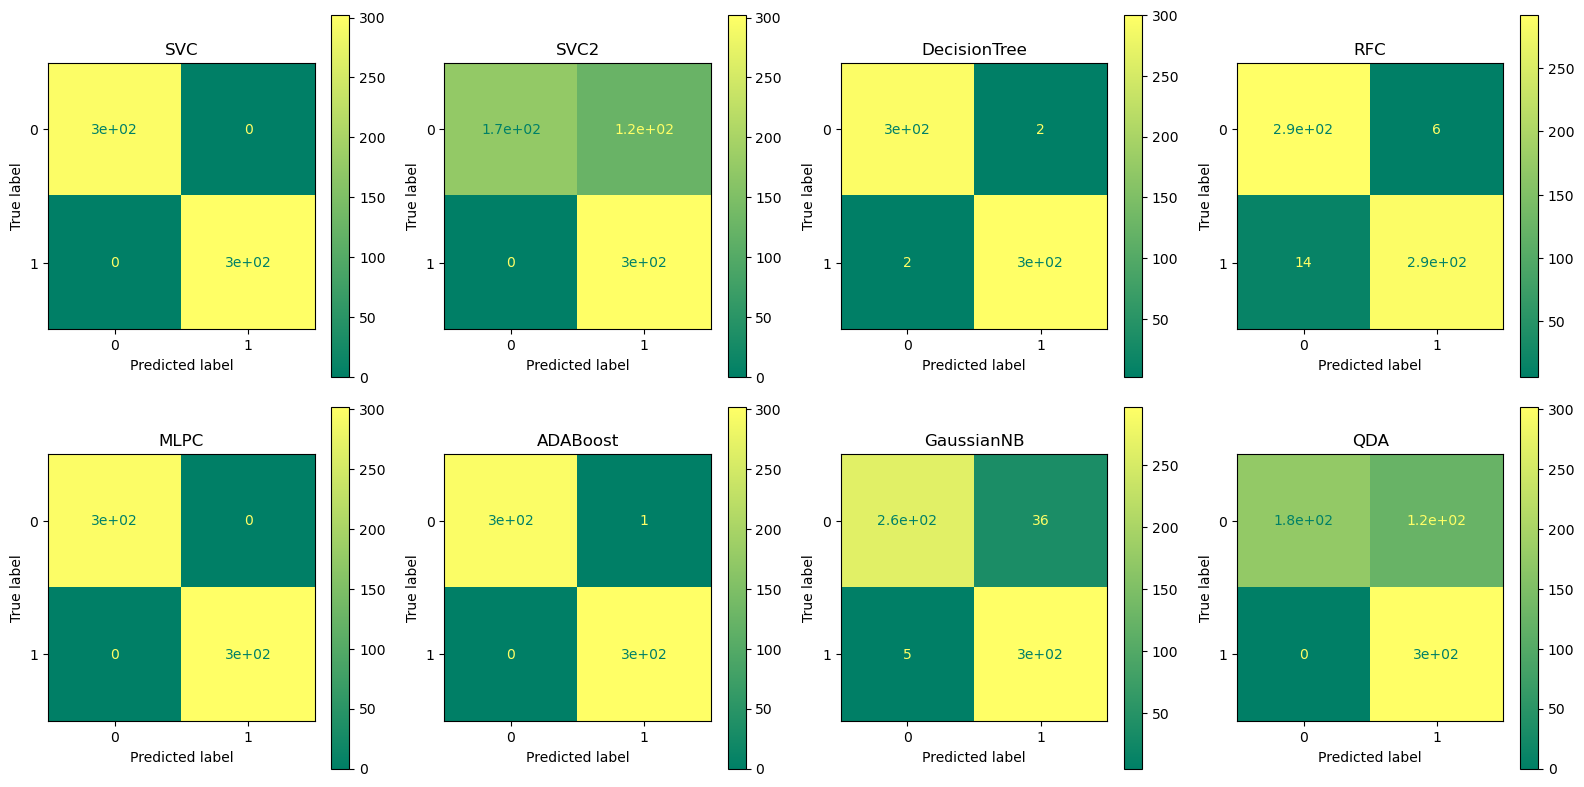

In [19]:
# AL: Modified code to print a grid of the 8, for easier viewing and presentation.

fig, ax = subplots(nrows=2, ncols=4, figsize=(16, 8))

for index, classifier in enumerate(classifiers):

    row = index // 4  # Calculate row index
    col = index % 4   # Calculate column index

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[:, :, index], display_labels=clf.classes_)
    disp.plot(ax=ax[row, col], cmap='summer')
    ax[row, col].set_title(classifier)

fig.tight_layout()

plt.show()

In [20]:
# fig, ax = subplots(nrows=no_classifiers, figsize=(8, 16))

# for index, classifier in enumerate(classifiers):

#     disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[:, :, index], display_labels=clf.classes_)
#     disp.plot(ax=ax[index], cmap='summer');
#     ax[index].set_title(classifier)

# fig.tight_layout()

# plt.show()

[1.   0.64 0.99 0.93 1.   1.   0.87 0.65]


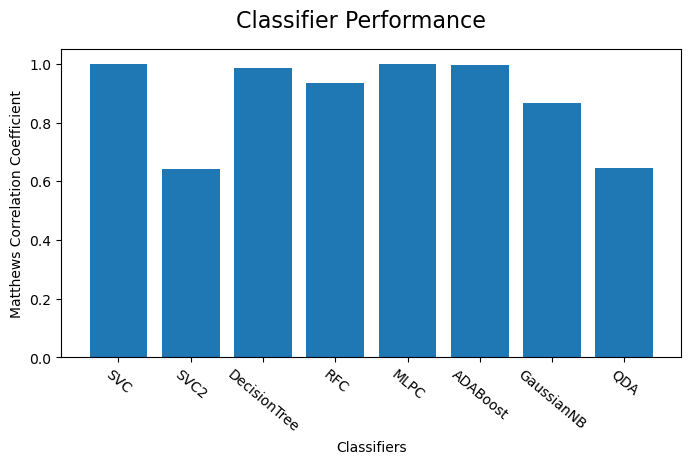

In [21]:
##Plot Performance of all Models##
fig, ax = plt.subplots(figsize=(8, 4))
plt.suptitle('Classifier Performance', fontsize=16)

bins = arange(len(classifiers))
ax.bar(arange(len(scores)), scores)
ax.set_ylabel('Matthews Correlation Coefficient')
ax.set_xlabel('Classifiers', fontsize=10)
ax.set_xticks(bins)
ax.set_xticklabels(classifiers, rotation=-40);

print(np.around(scores, 2))

As we can see, the majority of these classifiers have been successfully learning to classify the two groups of protein structure, with nearly perfect performance in the SVC model, the neural network MLPC, and ADABoost. We conclude that there are highly correlated features in the training data which the models have exploited. However, the Kidera factor is not the only method of encoding sequences for machine learning algorithms. In fact, for more complicated problems, deeper methods of encoding may be required.

### Using Amino Acid Compositions to Encode Protein Sequences

Amino acid compositions are a sequence based statistic as compared to the quantitative physico-chemical properties evaluated in the Kidera factors. The latter generate much denser and complex encodings which we will compare with the Kidera factor method. 


In [26]:
###Propythia Command to get encodings###
def get_descriptors(protein):
    ##This will retrieve a selection of encodings that are not dependent on the sequence length##
    test= protein.adaptable([3,4,5,6,7,8,9,10,11,12,13,14,17,18,19,20,21])
    return(test)

In [27]:
def Get_dataset(fasta):
    VH_sequences = []
    VL_sequences = []
    with open(fasta, "r") as f:
        for line in f:
            if line[0] == ">":
                if "_VH" in line:
                    sequence_to_add = f.readline().strip()
                    VH_sequences.append(sequence_to_add)
                elif "_VL" in line:
                    sequence_to_add = f.readline().strip()
                    VL_sequences.append(sequence_to_add)

    print(len(VH_sequences),len(VL_sequences))
    if len(VH_sequences) == len(VL_sequences):
        VH_dataframe = pd.DataFrame()
        VL_dataframe = pd.DataFrame()
        for i in range(len(VH_sequences)):
            ps_string=sequence.read_protein_sequence(VH_sequences[i])
            protein = Descriptor(ps_string)
            descriptors = get_descriptors(protein)
            #VH_dataframe.loc[len(VH_dataframe)] = descriptors
            VH_dataframe = VH_dataframe._append(descriptors, ignore_index=True)
        print("VH_data", VH_dataframe.shape)
        for i in range(len(VL_sequences)):
            ps_string=sequence.read_protein_sequence(VL_sequences[i])
            protein = Descriptor(ps_string)
            descriptors = get_descriptors(protein)
            #VL_dataframe.loc[len(VL_dataframe)] = descriptors
            VL_dataframe = VL_dataframe._append(descriptors, ignore_index=True)
        print("VL_data", VL_dataframe.shape)
    # Now we join these two dataframes together so that each sample now has information about its VH and VL sequence.
    VH_dataframe_suffix = VH_dataframe.add_suffix('_VH')
    VL_dataframe_suffix = VL_dataframe.add_suffix('_VL')
    joined_dataframe_VH_VL =  VH_dataframe_suffix.join(VL_dataframe_suffix)
    return(joined_dataframe_VH_VL)


In [28]:
### Input Fasta and Run Dataset###
input_fasta = '/Users/Adam/Downloads/Antibody_Materials-main/HumanMouseOAS_VH_VL_paired_data.faa'

#joined_dataframe_VH_VL = Get_dataset(input_fasta)

#Optionally save dataframe as a CSV to simply reload it in future
#joined_dataframe_VH_VL.to_csv('./HumanMouseOAS_VH_VL_paired_data.faa_Full_descriptors')#
joined_dataframe_VH_VL = read_csv('/Users/Adam/Downloads/Antibody_Materials-main/HumanMouseOAS_VH_VL_paired_data.faa_Full_descriptors.csv', header = 0)

### Do it yourself
- These encodings used with Propythia were selected to reduce the time taken to run. Retry the encoding step and experiment with the protein.adaptable([3,4,5,6,7,8,9,10,11,12,13,14,17,18,19,20,21]) array.

- NB Propythia accepts numbers 0-40 however we avoid 1, 2 and 37 as these produce outputs of differing length

In [29]:
RANDOM_SEED = 0
#Prepare training data and labels
labels1 = 1000*[1] ##Human antibodies will be class 1
labels2 = 1000*[0] ## Mouse antibodies will be class 0
labels = labels1+labels2
y=labels
print(len(y))
##Mouse ==1, Human == 0

dataset = joined_dataframe_VH_VL
dataset=dataset.loc[:, dataset.columns != 'Unnamed: 0']
print(dataset.shape) ##Just to check that you have an equal number of labels to the number of samples


2000
(2000, 890)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=.3, random_state=RANDOM_SEED, shuffle=True)
num_rows, num_cols = dataset.shape
print("Training set size: ", X_train.shape, "       Test set size: ", X_test.shape)


Training set size:  (1400, 890)        Test set size:  (600, 890)


### Do it yourself
- The list of classifiers used above is not exhaustive. These were picked to represent the major classes of models. You will find a much larger list of classifiers supported in scikit-learn here: https://scikit-learn.org/stable/supervised_learning.html.

- Try adding some new classifiers to the classifier dictionary and chack how the results differ.


GB: this is pretty much the same thing as above. Is it not enough to name the classifiers and give the scores as an answer?


In [31]:
RANDOM_SEED=42

classifiers = {
   'KNeighbours': KNeighborsClassifier(2),
   'Gaussian':    GaussianMixture(n_components=n),
   'KMeans':      KMeans(n_clusters=n)
}


GB: what about these? These are for clustering

In [32]:
##Loop through each classifier, fit training data and evaluate model. Plot results as confusion matrix##

no_classifiers = len(classifiers)

scores = []

confusion_matrices = zeros((2, 2, no_classifiers))

for index, classifier in enumerate(classifiers):
    clf        = classifiers.get(classifier)
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    scoring    = matthews_corrcoef(y_test, y_predict)
    scores.append(scoring) 
    confusion_matrices[:, :, index] = metrics.confusion_matrix(y_test, y_predict)
    
    # heatmap(confusion_matrix, annot=True, cmap='summer', ax=ax[index])


print('Complete')

/Users/Adam/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Complete


KNeighbours


AttributeError: 'KMeans' object has no attribute 'classes_'

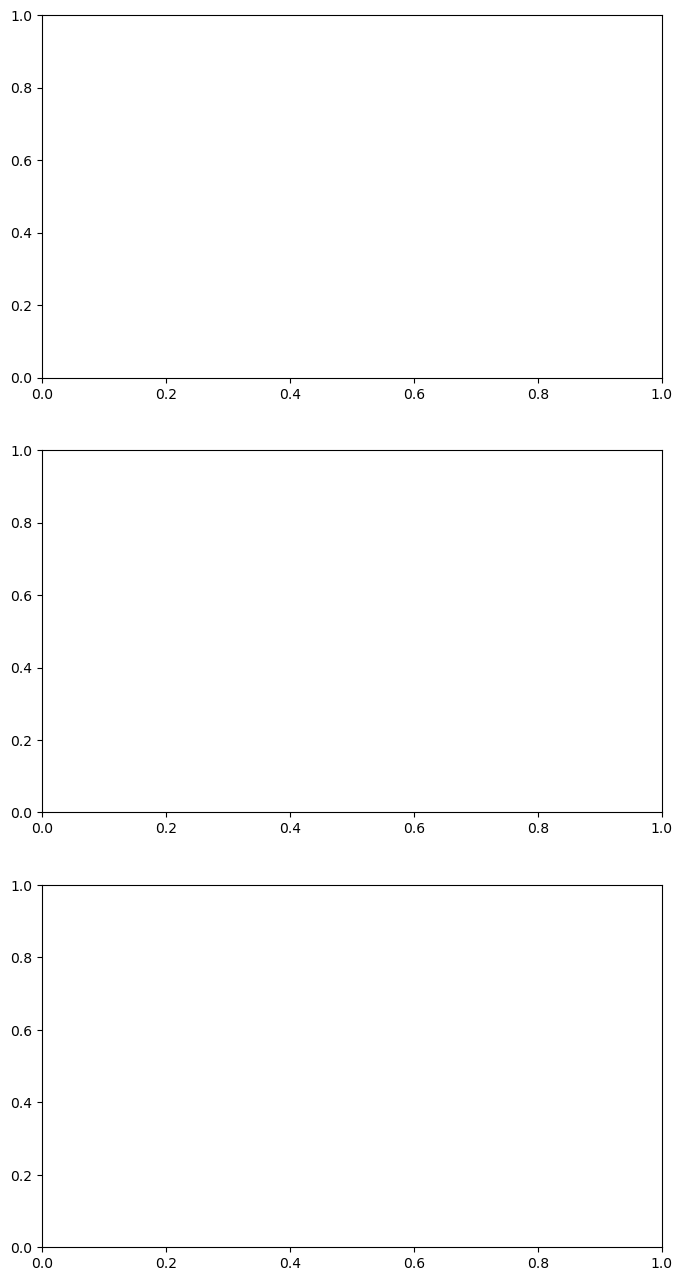

In [34]:
fig, ax = subplots(nrows=no_classifiers, figsize=(8, 16))

for index, classifier in enumerate(classifiers):

    print(classifier)
    
    if classifier == 'KMeans':
        disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[:, :, index], display_labels=clf.labels_)
    else:
        disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[:, :, index], display_labels=clf.classes_)


    disp.plot(ax=ax[index], cmap='summer');

    ax[index].set_title(classifier)


fig.tight_layout()

plt.show()

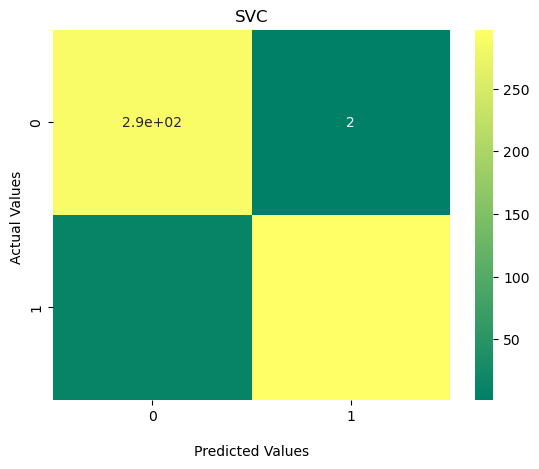

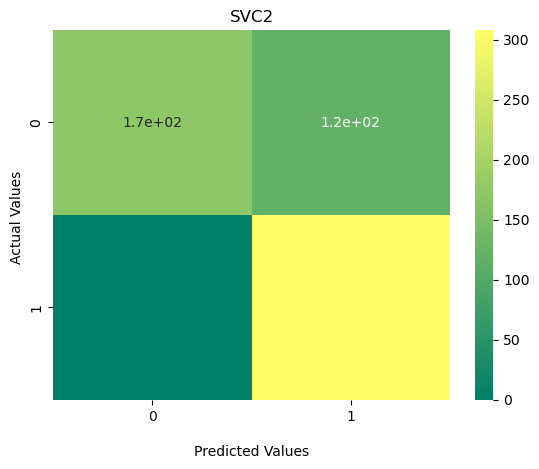

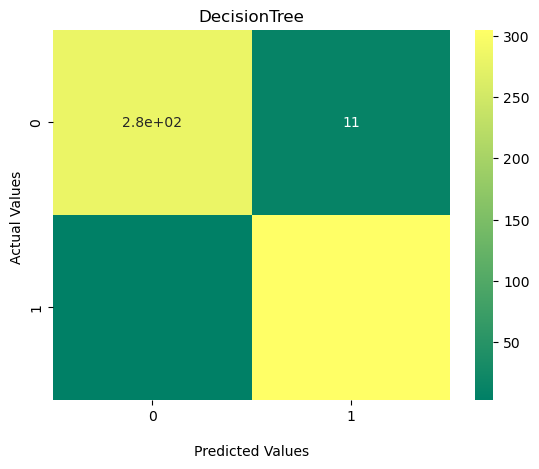

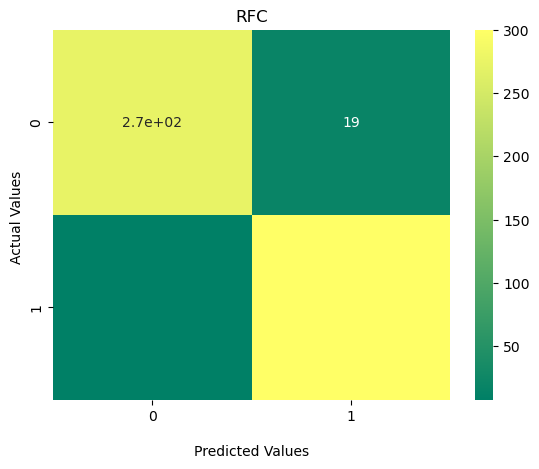

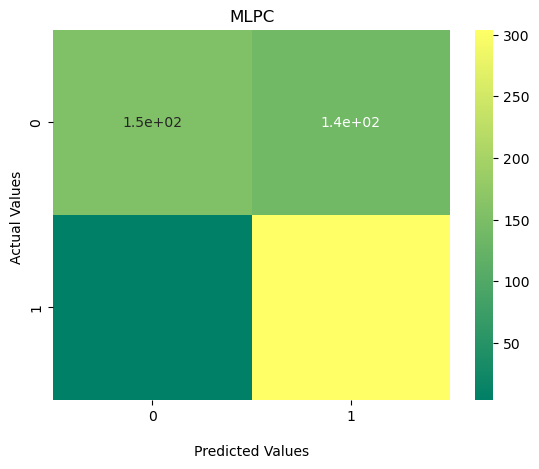

/Users/geroldbaier/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


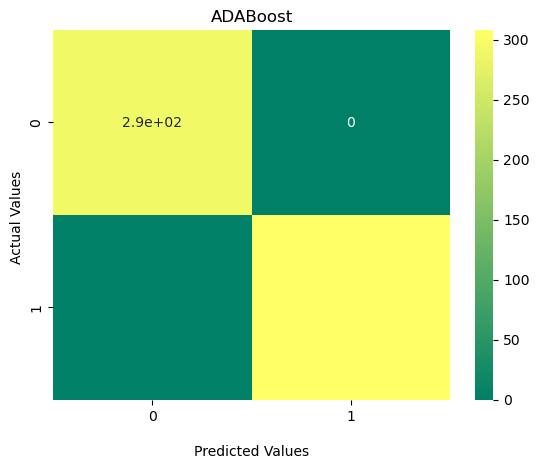

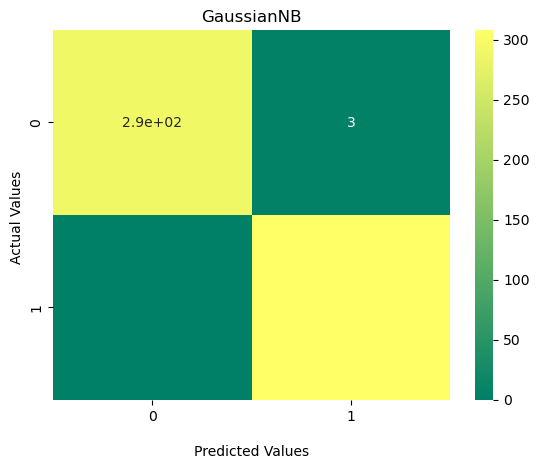

/Users/geroldbaier/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


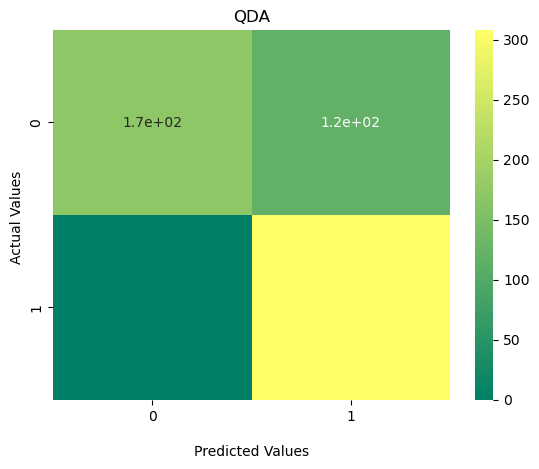

In [125]:
# ##Loop through each classifier, fit training data and evaluate model. Plot results as confusion matrix##
# scores = []

# for i in classifiers:
#     clf_1 = classifiers.get(i)
#     clf_1.fit(X_train,y_train)
#     y_predict1 = clf_1.predict(X_test)
#     scoring = matthews_corrcoef(y_test, y_predict1)
#     scores.append(scoring) 
#     confusion_matrix = metrics.confusion_matrix(y_test, y_predict1)
#     ax1 = sns.heatmap(confusion_matrix, annot=True, cmap='summer')
#     title = str(i)
#     ax1.set_title(title);
#     ax1.set_xlabel('\nPredicted Values')
#     ax1.set_ylabel('Actual Values ');
#     plt.show()



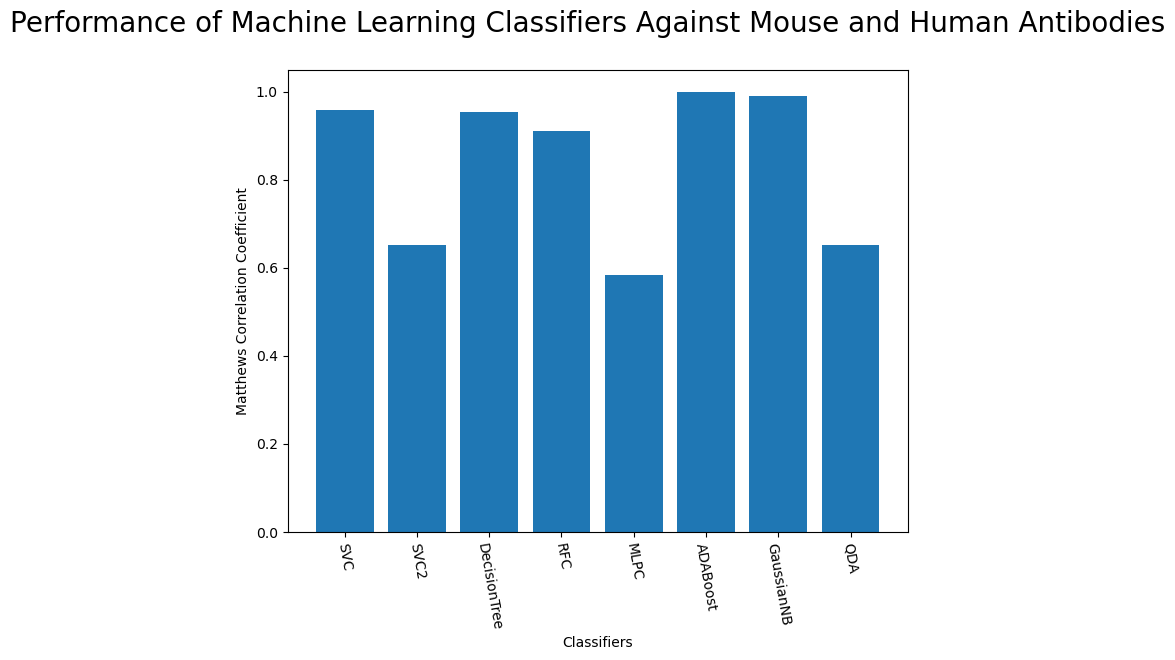

In [126]:
##Plot Performance of all Models##
fig, ax = plt.subplots(figsize=(8,6))
plt.suptitle('Performance of Machine Learning Classifiers Against Mouse and Human Antibodies', fontsize=20)

bins = arange(len(classifiers))
ax.bar(arange(len(scores)), scores)
ax.set_ylabel('Matthews Correlation Coefficient')
ax.set_xlabel('Classifiers')
ax.set_xticks(bins)
ax.set_xticklabels(classifiers, rotation=-80);

From the above chart, we can see that the best performing predictors are ADA_Boost, GaussinNB, DecisionTree and SVC are the best performing classifiers, wheras both Gaussian and KMeans are the worst performing with negative MCC scores.

GB: ADABoost is without underscore, it should be GaussianNB; and naive Bayesian needs explanation. So many typos. Where is Gaussian (GMM?) and KMeans in the graphic???


### Questions
- Which encoding method produced overall the best results? Why could this be? Hint: think of the size of both sets of encodings
- What could be the advantages and disadvantages of both sets of encodings?

GB: If people have no backgroundf in how the algorithms work, they cannot answer the "why could this be" question. 

## End of Chapter Exercise: Testing our Classifiers on a Naïve Dataset

We have seen that it is possible to separate mouse and human antibody protein sequences through their numerical encodings.

We can also take a totally naïve dataset that the model has not been exposed to. This is a measure that checks for overfitting. If we see that there is poor performance on this naïve "held back" dataset, then it could suggest overfitting to the training data. Using 20 Human and 20 mouse paired sequences from OAS, which were not used to train our models, it is possible to generate their encodings, and pass them through the optimised model, in order to test it.  

The file below has 20 human and 20 mouse sequences which are held back from our original training data. Using the skills you have learned so far in this notebook, encode these paired sequences and generate a list of labels for these entries. Pass them through the trained classifiers and evaluate their performance.

- Comment on which classifier performs best.
- Think of ways in which the classifiers can be improved. These will be expanded upon in the next Notebook.

`naive_fasta = './Naive_dataset.faa.txt'`


## Keypoints

- Protein sequences must be numerically encoded to be readable by machine learning algorithms.
- It is necessary to test your classifier with multiple models and multiple encoding methods to find which works the best